<a href="https://colab.research.google.com/github/Ahmadsanoh/Big-Data-Analysis/blob/main/Big_data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. What is the correlation between the price from local e-commerce sites or amazons and the e-commerce type? Sanoh
2. Are Indians more likely to buy from local e-commerce sites or amazone ? sanoh

**Based on the most likely e-commerce site:**
3. Which category has the highest sales?  elean
4. Which product categories had the highest number of cancelled orders, and what percentage of orders were cancelled for each category?  (descriptive analysis) - Tasnuva
5. How to analyse fulfilment of selling based on the percentage of  status and courier status? elean
6. Does the ship-service level have an impact on the result of the currier status? Elean
7. A person wants to order a product . What is your advice to the person?  ( Open ended ) elean
8. How does the total sales revenue vary by product category and size? (descriptive analysis) - Tasnuva
9. What was the best month for sales? How much was earned that month? julyana
10. Can we predict future sales figures using the available data? (predictive analysis) - Tasnuva
11. Can we identify the most valuable customers and target them with personalised promotions?(predictive) - Tasnuva


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
amazon = pd.read_csv('Amazon Sale Report.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
amazon

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
del amazon['ship-service-level']

In [ ]:
amazon

,index,Order ID,Date,Status,Fulfilment,Sales Channel,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
del amazon['SKU']

In [ ]:
amazon

,index,Order ID,Date,Status,Fulfilment,Sales Channel,Style,Category,Size,ASIN,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,SET389,Set,S,B09KXVBD7Z,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,JNE3781,kurta,3XL,B09K3WFS32,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,JNE3371,kurta,XL,B07WV4JV4D,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,J0341,Western Dress,L,B099NRCT7B,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,JNE3671,Top,3XL,B098714BZP,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,JNE3697,kurta,XL,B098112V2V,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,SET401,Set,M,B09VC6KHX8,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,J0157,Western Dress,XXL,B0982YZ51B,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,J0012,Set,XS,B0894Y2NJQ,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
del amazon['Size']
del amazon['ship-postal-code']

In [ ]:
amazon

,index,Order ID,Date,Status,Fulfilment,Sales Channel,Style,Category,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,SET389,Set,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,JNE3781,kurta,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,JNE3371,kurta,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,J0341,Western Dress,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,JNE3671,Top,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,JNE3697,kurta,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,SET401,Set,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,J0157,Western Dress,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,J0012,Set,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [ ]:
del amazon['fulfilled-by']
del amazon['ASIN']
del amazon['Style']
del amazon['Date']
del amazon['Unnamed: 22']

In [ ]:
amazon

,index,Order ID,Status,Fulfilment,Sales Channel,Category,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Set,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,IN,NaN,False
1,1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,kurta,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,Shipped,Amazon,Amazon.in,kurta,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Western Dress,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,NaN,False
4,4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Top,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,IN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,Shipped,Amazon,Amazon.in,kurta,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,IN,NaN,False
128971,128971,402-9551604-7544318,Shipped,Amazon,Amazon.in,Set,Shipped,1,INR,999.00,GURUGRAM,HARYANA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,128972,407-9547469-3152358,Shipped,Amazon,Amazon.in,Western Dress,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,IN,NaN,False
128973,128973,402-6184140-0545956,Shipped,Amazon,Amazon.in,Set,Shipped,1,INR,1199.00,Halol,Gujarat,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [ ]:
del amazon['Qty']

In [ ]:
amazon.T

,0,1,2,3,4,5,6,7,8,9,...,128965,128966,128967,128968,128969,128970,128971,128972,128973,128974
index,0,1,2,3,4,5,6,7,8,9,...,128965,128966,128967,128968,128969,128970,128971,128972,128973,128974
Order ID,405-8078784-5731545,171-9198151-1101146,404-0687676-7273146,403-9615377-8133951,407-1069790-7240320,404-1490984-4578765,408-5748499-6859555,406-7807733-3785945,407-5443024-5233168,402-4393761-0311520,...,408-5154281-4593912,406-9812666-2474761,404-5182288-1653947,403-7059995-7618722,404-3802633-7250760,406-6001380-7673107,402-9551604-7544318,407-9547469-3152358,402-6184140-0545956,408-7436540-8728312
Status,Cancelled,Shipped - Delivered to Buyer,Shipped,Cancelled,Shipped,Shipped,Shipped,Shipped - Delivered to Buyer,Cancelled,Shipped,...,Cancelled,Shipped,Cancelled,Shipped,Cancelled,Shipped,Shipped,Shipped,Shipped,Shipped
Fulfilment,Merchant,Merchant,Amazon,Merchant,Amazon,Amazon,Amazon,Merchant,Amazon,Amazon,...,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon
Sales Channel,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
Category,Set,kurta,kurta,Western Dress,Top,Set,Set,kurta,Set,kurta,...,Top,Set,kurta,Set,Set,kurta,Set,Western Dress,Set,Set
Courier Status,NaN,Shipped,Shipped,NaN,Shipped,Shipped,Shipped,Shipped,Cancelled,Shipped,...,Unshipped,Shipped,Cancelled,Shipped,Unshipped,Shipped,Shipped,Shipped,Shipped,Shipped
currency,INR,INR,INR,INR,INR,INR,INR,INR,NaN,INR,...,INR,INR,NaN,INR,INR,INR,INR,INR,INR,INR
Amount,647.62,406.0,329.0,753.33,574.0,824.0,653.0,399.0,NaN,363.0,...,574.0,1132.0,NaN,824.0,612.0,517.0,999.0,690.0,1199.0,696.0
ship-city,MUMBAI,BENGALURU,NAVI MUMBAI,PUDUCHERRY,CHENNAI,GHAZIABAD,CHANDIGARH,HYDERABAD,HYDERABAD,Chennai,...,Prayagraj (ALLAHABAD),CHENNAI 600042,Kolkata,Delhi,MUMBAI,HYDERABAD,GURUGRAM,HYDERABAD,Halol,Raipur


In [ ]:
amazon.dropna

<bound method DataFrame.dropna of          index             Order ID                        Status Fulfilment  \
0            0  405-8078784-5731545                     Cancelled   Merchant   
1            1  171-9198151-1101146  Shipped - Delivered to Buyer   Merchant   
2            2  404-0687676-7273146                       Shipped     Amazon   
3            3  403-9615377-8133951                     Cancelled   Merchant   
4            4  407-1069790-7240320                       Shipped     Amazon   
...        ...                  ...                           ...        ...   
128970  128970  406-6001380-7673107                       Shipped     Amazon   
128971  128971  402-9551604-7544318                       Shipped     Amazon   
128972  128972  407-9547469-3152358                       Shipped     Amazon   
128973  128973  402-6184140-0545956                       Shipped     Amazon   
128974  128974  408-7436540-8728312                       Shipped     Amazon   

     

In [ ]:
amazon

,index,Order ID,Status,Fulfilment,Sales Channel,Category,Courier Status,currency,Amount,ship-city,ship-state,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Set,NaN,INR,647.62,MUMBAI,MAHARASHTRA,IN,NaN,False
1,1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,kurta,Shipped,INR,406.00,BENGALURU,KARNATAKA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,Shipped,Amazon,Amazon.in,kurta,Shipped,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Western Dress,NaN,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,NaN,False
4,4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Top,Shipped,INR,574.00,CHENNAI,TAMIL NADU,IN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,Shipped,Amazon,Amazon.in,kurta,Shipped,INR,517.00,HYDERABAD,TELANGANA,IN,NaN,False
128971,128971,402-9551604-7544318,Shipped,Amazon,Amazon.in,Set,Shipped,INR,999.00,GURUGRAM,HARYANA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,128972,407-9547469-3152358,Shipped,Amazon,Amazon.in,Western Dress,Shipped,INR,690.00,HYDERABAD,TELANGANA,IN,NaN,False
128973,128973,402-6184140-0545956,Shipped,Amazon,Amazon.in,Set,Shipped,INR,1199.00,Halol,Gujarat,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [ ]:
amazon.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
128970    False
128971    False
128972    False
128973    False
128974    False
Length: 128975, dtype: bool

In [ ]:
amazon.duplicated(keep = False)

0         False
1         False
2         False
3         False
4         False
          ...  
128970    False
128971    False
128972    False
128973    False
128974    False
Length: 128975, dtype: bool

In [ ]:
amazon.duplicated(keep = 'first')

0         False
1         False
2         False
3         False
4         False
          ...  
128970    False
128971    False
128972    False
128973    False
128974    False
Length: 128975, dtype: bool

In [ ]:
amazon.drop_duplicates(inplace = True)

In [ ]:
amazon.drop_duplicates(keep = 'last', inplace = True)

In [ ]:
amazon.isnull().sum()

index                 0
Order ID              0
Status                0
Fulfilment            0
Sales Channel         0
Category              0
Courier Status     6872
currency           7795
Amount             7795
ship-city            33
ship-state           33
ship-country         33
promotion-ids     49153
B2B                   0
dtype: int64

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128975 entries, 0 to 128974
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           128975 non-null  int64  
 1   Order ID        128975 non-null  object 
 2   Status          128975 non-null  object 
 3   Fulfilment      128975 non-null  object 
 4   Sales Channel   128975 non-null  object 
 5   Category        128975 non-null  object 
 6   Courier Status  122103 non-null  object 
 7   currency        121180 non-null  object 
 8   Amount          121180 non-null  float64
 9   ship-city       128942 non-null  object 
 10  ship-state      128942 non-null  object 
 11  ship-country    128942 non-null  object 
 12  promotion-ids   79822 non-null   object 
 13  B2B             128975 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [ ]:
amazon.Category.unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [ ]:
amazon.B2B.unique()

array([False,  True])

In [ ]:
amazon.currency.unique()

array(['INR', nan], dtype=object)

In [ ]:
amazon.Fulfilment.unique()

array(['Merchant', 'Amazon'], dtype=object)

In [ ]:
amazon.dropna(axis=0, how='all')

,index,Order ID,Status,Fulfilment,Sales Channel,Category,Courier Status,currency,Amount,ship-city,ship-state,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,Cancelled,Merchant,Amazon.in,Set,NaN,INR,647.62,MUMBAI,MAHARASHTRA,IN,NaN,False
1,1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,kurta,Shipped,INR,406.00,BENGALURU,KARNATAKA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,Shipped,Amazon,Amazon.in,kurta,Shipped,INR,329.00,NAVI MUMBAI,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,Cancelled,Merchant,Amazon.in,Western Dress,NaN,INR,753.33,PUDUCHERRY,PUDUCHERRY,IN,NaN,False
4,4,407-1069790-7240320,Shipped,Amazon,Amazon.in,Top,Shipped,INR,574.00,CHENNAI,TAMIL NADU,IN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,Shipped,Amazon,Amazon.in,kurta,Shipped,INR,517.00,HYDERABAD,TELANGANA,IN,NaN,False
128971,128971,402-9551604-7544318,Shipped,Amazon,Amazon.in,Set,Shipped,INR,999.00,GURUGRAM,HARYANA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,128972,407-9547469-3152358,Shipped,Amazon,Amazon.in,Western Dress,Shipped,INR,690.00,HYDERABAD,TELANGANA,IN,NaN,False
128973,128973,402-6184140-0545956,Shipped,Amazon,Amazon.in,Set,Shipped,INR,1199.00,Halol,Gujarat,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [ ]:
amazon.dropna(inplace=True)

In [ ]:
amazon

,index,Order ID,Status,Fulfilment,Sales Channel,Category,Courier Status,currency,Amount,ship-city,ship-state,ship-country,promotion-ids,B2B
1,1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,kurta,Shipped,INR,406.0,BENGALURU,KARNATAKA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,Shipped,Amazon,Amazon.in,kurta,Shipped,INR,329.0,NAVI MUMBAI,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
5,5,404-1490984-4578765,Shipped,Amazon,Amazon.in,Set,Shipped,INR,824.0,GHAZIABAD,UTTAR PRADESH,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
6,6,408-5748499-6859555,Shipped,Amazon,Amazon.in,Set,Shipped,INR,653.0,CHANDIGARH,CHANDIGARH,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
7,7,406-7807733-3785945,Shipped - Delivered to Buyer,Merchant,Amazon.in,kurta,Shipped,INR,399.0,HYDERABAD,TELANGANA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128957,128957,402-8261465-0622733,Shipped,Amazon,Amazon.in,Set,Shipped,INR,1349.0,RANCHI,JHARKHAND,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128968,128968,403-7059995-7618722,Shipped,Amazon,Amazon.in,Set,Shipped,INR,824.0,Delhi,DELHI,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128971,128971,402-9551604-7544318,Shipped,Amazon,Amazon.in,Set,Shipped,INR,999.0,GURUGRAM,HARYANA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128973,128973,402-6184140-0545956,Shipped,Amazon,Amazon.in,Set,Shipped,INR,1199.0,Halol,Gujarat,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False



1. What is the correlation between the price from local e-commerce sites or amazons and the e-commerce type?


In [ ]:
correlation = amazon[['currency', 'Amount', 'Category']]

In [ ]:
correlation

,currency,Amount,Category
1,INR,406.0,kurta
2,INR,329.0,kurta
5,INR,824.0,Set
6,INR,653.0,Set
7,INR,399.0,kurta
...,...,...,...
128957,INR,1349.0,Set
128968,INR,824.0,Set
128971,INR,999.0,Set
128973,INR,1199.0,Set


In [ ]:
g= pd.DataFrame(correlation.groupby(['Amount'])['currency'].sum().reset_index())

In [ ]:
g

,Amount,currency
0,0.0,INRINRINRINRINRINRINRINRINRINRINRINRINRINRINRI...
1,229.0,INRINRINRINRINRINRINRINRINRINRINRINRINR
2,241.0,INR
3,248.0,INRINRINRINR
4,249.0,INRINRINRINRINRINRINRINRINRINRINRINRINRINRINRI...
...,...,...
836,2796.0,INR
837,2860.0,INR
838,2894.0,INR
839,3036.0,INR


In [ ]:
International_sale_report = pd.read_csv('International sale Report.csv')

In [ ]:
International_sale_report

,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...,...,...,...
37427,37427,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37428,37428,AVIN,03-31-22,Mar-22,PJNE3404,PJNE3404-KR-4XL,1.00,500.00,500.00,5.00
37429,37429,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37430,37430,AVIN,03-31-22,Mar-22,SET290,SET290-KR-DPT-M,1.00,812.50,812.00,7.00


In [ ]:
del International_sale_report['Months']
del International_sale_report['SKU']
del International_sale_report['Style']

In [ ]:
International_sale_report

,index,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
1,1,06-05-21,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
2,2,06-05-21,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
3,3,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
4,4,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...
37427,37427,AVIN,Mar-22,1.00,537.50,538.00,4.00
37428,37428,AVIN,Mar-22,1.00,500.00,500.00,5.00
37429,37429,AVIN,Mar-22,1.00,537.50,538.00,4.00
37430,37430,AVIN,Mar-22,1.00,812.50,812.00,7.00


In [ ]:
International_sale_report.dropna

<bound method DataFrame.dropna of        index      DATE            CUSTOMER  Size      PCS     RATE GROSS AMT
0          0  06-05-21  REVATHY LOGANATHAN     L     1.00   616.56    617.00
1          1  06-05-21  REVATHY LOGANATHAN    XL     1.00   616.56    617.00
2          2  06-05-21  REVATHY LOGANATHAN   XXL     1.00   616.56    617.00
3          3  06-05-21  REVATHY LOGANATHAN     L     1.00   616.56    617.00
4          4  06-05-21  REVATHY LOGANATHAN     L     1.00   616.56    617.00
...      ...       ...                 ...   ...      ...      ...       ...
37427  37427    AVIN                Mar-22  1.00   537.50   538.00      4.00
37428  37428    AVIN                Mar-22  1.00   500.00   500.00      5.00
37429  37429    AVIN                Mar-22  1.00   537.50   538.00      4.00
37430  37430    AVIN                Mar-22  1.00   812.50   812.00      7.00
37431  37431    AVIN                Mar-22  1.00  3666.00  3666.00      0.00

[37432 rows x 7 columns]>

In [ ]:
International_sale_report.dropna(inplace=True)

In [ ]:
International_sale_report

,index,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
1,1,06-05-21,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
2,2,06-05-21,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
3,3,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
4,4,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...
37427,37427,AVIN,Mar-22,1.00,537.50,538.00,4.00
37428,37428,AVIN,Mar-22,1.00,500.00,500.00,5.00
37429,37429,AVIN,Mar-22,1.00,537.50,538.00,4.00
37430,37430,AVIN,Mar-22,1.00,812.50,812.00,7.00


In [ ]:
International_sale_report['Size'] = International_sale_report['Size'].str.replace('\d+', '')

<ipython-input-223-f45cc8e8625a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  International_sale_report['Size'] = International_sale_report['Size'].str.replace('\d+', '')


In [ ]:
International_sale_report

,index,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
1,1,06-05-21,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
2,2,06-05-21,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
3,3,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
4,4,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...
37427,37427,AVIN,Mar-22,.,537.50,538.00,4.00
37428,37428,AVIN,Mar-22,.,500.00,500.00,5.00
37429,37429,AVIN,Mar-22,.,537.50,538.00,4.00
37430,37430,AVIN,Mar-22,.,812.50,812.00,7.00


In [ ]:
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Mar-22', '')

In [ ]:
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Nov-21', '')

In [ ]:
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Oct-22', '')
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Dec-21', '')
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Feb-22', '')
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Jan-22', '')
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Oct-21', '')
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Sep-21', '')
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Aug-21', '')
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Jul-21', '')
International_sale_report['CUSTOMER'] = International_sale_report['CUSTOMER'].str.replace('Jun-21', '')


In [ ]:
International_sale_report

,index,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
1,1,06-05-21,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
2,2,06-05-21,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
3,3,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
4,4,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...
37427,37427,AVIN,,.,537.50,538.00,4.00
37428,37428,AVIN,,.,500.00,500.00,5.00
37429,37429,AVIN,,.,537.50,538.00,4.00
37430,37430,AVIN,,.,812.50,812.00,7.00


In [ ]:
International_sale_report['Size'] = International_sale_report['Size'].str.replace('Free', '')

International_sale_report['Size'] = International_sale_report['Size'].str.replace('.', '')

<ipython-input-229-c7db1af74907>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  International_sale_report['Size'] = International_sale_report['Size'].str.replace('.', '')


In [ ]:
International_sale_report

,index,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
1,1,06-05-21,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
2,2,06-05-21,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
3,3,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
4,4,06-05-21,REVATHY LOGANATHAN,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...
37427,37427,AVIN,,,537.50,538.00,4.00
37428,37428,AVIN,,,500.00,500.00,5.00
37429,37429,AVIN,,,537.50,538.00,4.00
37430,37430,AVIN,,,812.50,812.00,7.00


In [ ]:
International_sale_report['DATE'] = International_sale_report['DATE'].str.replace(r'\D', '')

<ipython-input-231-6b418ab7a4b5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  International_sale_report['DATE'] = International_sale_report['DATE'].str.replace(r'\D', '')


In [ ]:
International_sale_report

,index,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,0,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
1,1,060521,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
2,2,060521,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
3,3,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
4,4,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...
37427,37427,,,,537.50,538.00,4.00
37428,37428,,,,500.00,500.00,5.00
37429,37429,,,,537.50,538.00,4.00
37430,37430,,,,812.50,812.00,7.00


In [ ]:
International_sale_report.dropna(subset=['CUSTOMER'], inplace=True)

In [ ]:
International_sale_report

,index,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,0,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
1,1,060521,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
2,2,060521,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
3,3,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
4,4,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...
37427,37427,,,,537.50,538.00,4.00
37428,37428,,,,500.00,500.00,5.00
37429,37429,,,,537.50,538.00,4.00
37430,37430,,,,812.50,812.00,7.00


In [ ]:
International_sale_report['DATE'].replace('', np.nan, inplace=True)
International_sale_report['Size'].replace('', np.nan, inplace=True)
International_sale_report['CUSTOMER'].replace('', np.nan, inplace=True)

In [ ]:
International_sale_report

,index,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,0,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
1,1,060521,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
2,2,060521,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
3,3,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
4,4,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...
37427,37427,NaN,NaN,NaN,537.50,538.00,4.00
37428,37428,NaN,NaN,NaN,500.00,500.00,5.00
37429,37429,NaN,NaN,NaN,537.50,538.00,4.00
37430,37430,NaN,NaN,NaN,812.50,812.00,7.00


In [ ]:
International_sale_report.dropna(subset=['DATE'], inplace=True)
International_sale_report.dropna(subset=['CUSTOMER'], inplace=True)
International_sale_report.dropna(subset=['Size'], inplace=True)

In [ ]:
International_sale_report

,index,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,0,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
1,1,060521,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
2,2,060521,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
3,3,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
4,4,060521,REVATHY LOGANATHAN,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...
18630,18630,043022,Rino Sandaran,S,1.00,1812.50,1812.50
18631,18631,043022,Rino Sandaran,M,1.00,1512.50,1512.50
18632,18632,043022,Rino Sandaran,L,1.00,1512.50,1512.50
18633,18633,043022,Rino Sandaran,XXXL,1.00,1312.50,1312.50


2. Are Indians more likely to buy from local e-commerce sites or amazone?

In [ ]:
# Merge
E_commerce = pd.merge(amazon, International_sale_report)

In [ ]:
E_commerce

,index,Order ID,Status,Fulfilment,Sales Channel,Category,Courier Status,currency,Amount,ship-city,ship-state,ship-country,promotion-ids,B2B,DATE,CUSTOMER,Size,PCS,RATE,GROSS AMT
0,1,171-9198151-1101146,Shipped - Delivered to Buyer,Merchant,Amazon.in,kurta,Shipped,INR,406.0,BENGALURU,KARNATAKA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,060521,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
1,2,404-0687676-7273146,Shipped,Amazon,Amazon.in,kurta,Shipped,INR,329.0,NAVI MUMBAI,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,060521,REVATHY LOGANATHAN,XXL,1.00,616.56,617.00
2,5,404-1490984-4578765,Shipped,Amazon,Amazon.in,Set,Shipped,INR,824.0,GHAZIABAD,UTTAR PRADESH,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,060521,REVATHY LOGANATHAN,L,1.00,649.03,649.00
3,6,408-5748499-6859555,Shipped,Amazon,Amazon.in,Set,Shipped,INR,653.0,CHANDIGARH,CHANDIGARH,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,060521,REVATHY LOGANATHAN,XL,1.00,616.56,617.00
4,7,406-7807733-3785945,Shipped - Delivered to Buyer,Merchant,Amazon.in,kurta,Shipped,INR,399.0,HYDERABAD,TELANGANA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,060521,REVATHY LOGANATHAN,XXL,1.00,649.03,649.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11814,18627,405-5067568-1151563,Shipped,Amazon,Amazon.in,Western Dress,Shipped,INR,744.0,ADOOR,KERALA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,043022,Rino Sandaran,S,1.00,1275.00,1275.00
11815,18629,171-8971992-9623559,Shipped - Delivered to Buyer,Merchant,Amazon.in,Western Dress,Shipped,INR,744.0,Kunnamkulam,KERALA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,043022,Rino Sandaran,L,1.00,1275.00,1275.00
11816,18631,407-6974075-9112315,Shipped - Delivered to Buyer,Merchant,Amazon.in,Western Dress,Shipped,INR,744.0,HYDERABAD,TELANGANA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,043022,Rino Sandaran,M,1.00,1512.50,1512.50
11817,18632,408-6697338-7613114,Shipped,Amazon,Amazon.in,kurta,Shipped,INR,399.0,"Kottaram, Kanyakumari",TAMIL NADU,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,043022,Rino Sandaran,L,1.00,1512.50,1512.50


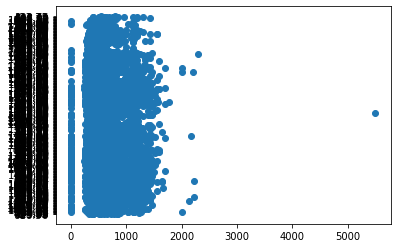

In [ ]:
plt.scatter(x=E_commerce['Amount'], y=E_commerce['RATE'])

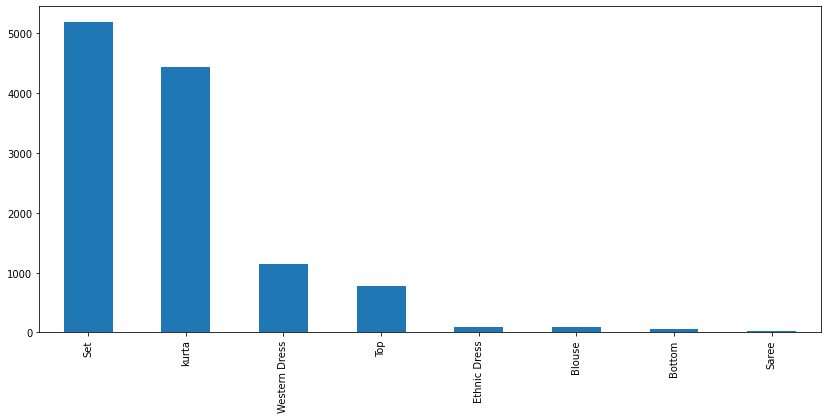

In [ ]:
ax = E_commerce['Category'].value_counts().plot(kind='bar', figsize=(14,6))

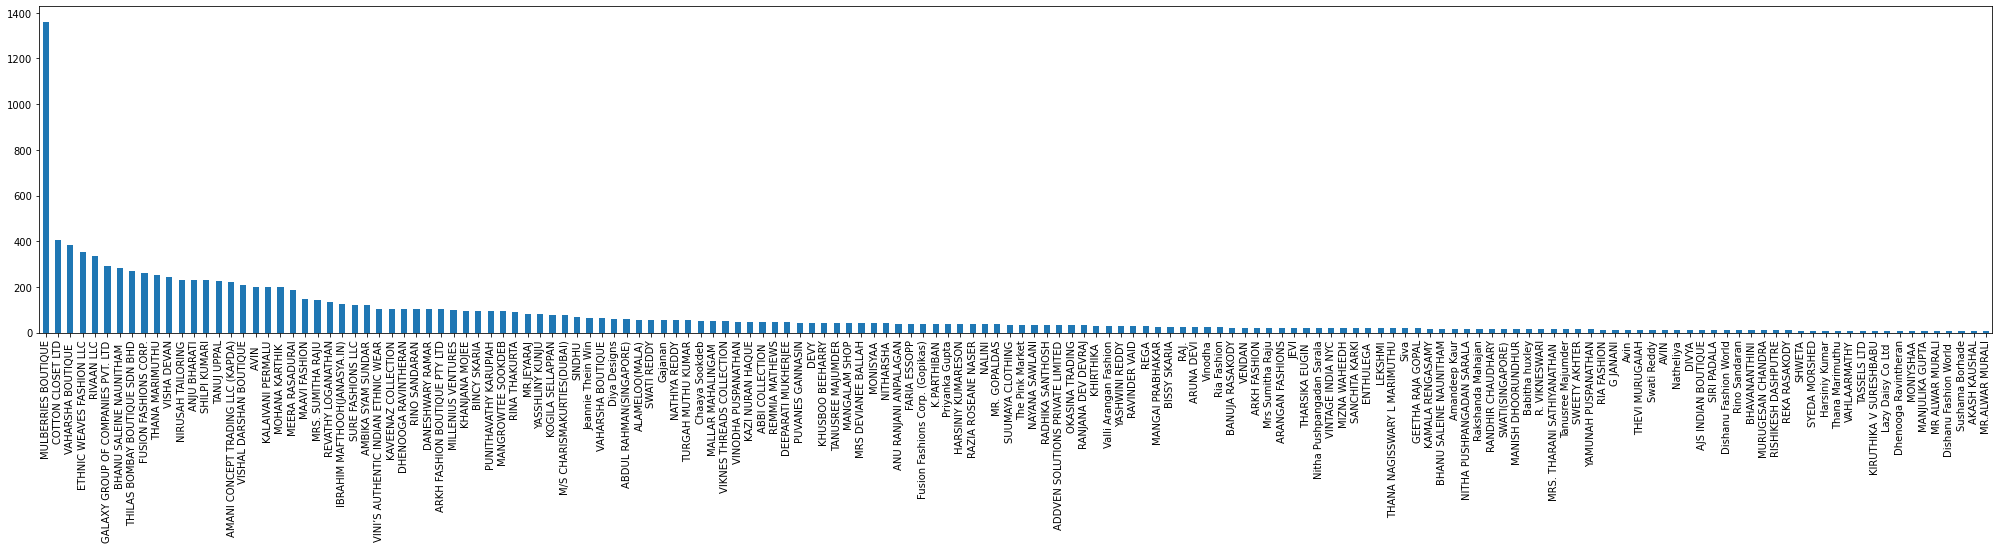

In [ ]:
ax = E_commerce['CUSTOMER'].value_counts().plot(kind='bar', figsize=(35,6))

In [ ]:
E_commerce['Size'].value_counts().plot(kind='pie', figsize=(35,10))

NameError: ignored

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


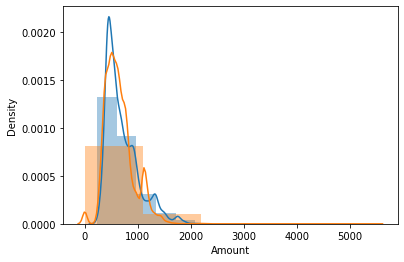

In [ ]:
sns.distplot(E_commerce['RATE'], bins=5, kde=True )
sns.distplot(E_commerce['Amount'], bins=5, kde=True )

In [ ]:
corr = E_commerce.corr()

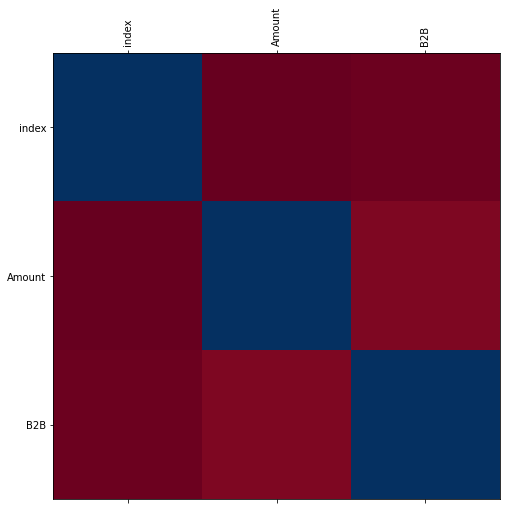

In [ ]:
fig = plt.figure(figsize=(18,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);